# Загрузка Pandas и очистка данных

In [1]:
# загрузим необходимые бибилиотеки
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
# зададим размер графиков по умолчанию
plt.rcParams['figure.figsize'] = (17, 8)

In [2]:
# для воспроизведения результатов зафиксируем значение random_seed
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
df_main = pd.read_csv('main_task.csv')

In [5]:
#знакомимся с данными df_main
df_main.info()
df_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.0+ MB


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [6]:
df_kaggle = pd.read_csv('kaggle_task.csv')

In [7]:
#знакомимся с данными df_kaggle
df_kaggle.info()
df_kaggle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 429.8+ KB


,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [8]:
df_sample = pd.read_csv('sample_submission.csv')

In [9]:
#знакомимся с данными df_sample
df_sample.info()
df_sample.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 117.2+ KB


,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
# для корректной обработки признаков объединяем main и kaggle в один датасет
df_main['sample'] = 1 # помечаем где у нас main
df_kaggle['sample'] = 0 # помечаем где у нас kaggle
df_kaggle['Rating'] = 0 # в kaggle у нас нет значения Rating, мы его должны предсказать, поэтому пока просто заполняем нулями

df = df_kaggle.append(df_main, sort=False).reset_index(drop=True) # объединяем

In [11]:
df.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
13602,id_2398,Barcelona,"['Healthy', 'Hawaiian', 'Vegetarian Friendly',...",2399.0,$$ - $$$,10.0,"[['Best Poke Restaurant in Barcelona', 'Best b...",/Restaurant_Review-g187497-d12912094-Reviews-O...,d12912094,1,5.0
43321,id_178,Copenhagen,"['European', 'Scandinavian', 'Danish', 'Vegeta...",179.0,$$ - $$$,468.0,"[['What I was hoping for', 'Smørrebrød all day...",/Restaurant_Review-g189541-d695036-Reviews-Ida...,d695036,1,4.0
7112,id_7112,Milan,NaN,3278.0,NaN,27.0,"[['Great', 'Amazing gem!'], ['10/13/2016', '06...",/Restaurant_Review-g187849-d7699721-Reviews-Cr...,d7699721,0,0.0
46772,id_2533,Amsterdam,NaN,2540.0,NaN,2.0,"[['Great place for a snack, a meal, or just d....",/Restaurant_Review-g188590-d8700085-Reviews-Ca...,d8700085,1,4.5
35130,id_2101,Warsaw,NaN,2102.0,NaN,2.0,"[['Nothing New', 'could do better'], ['09/24/2...",/Restaurant_Review-g274856-d8866462-Reviews-Pi...,d8866462,1,2.0


In [12]:
#узнаем колонки, чтобы потом переименовать
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [13]:
#переименовываем колонки
df.rename(columns={'Restaurant_id':'restaurant_id', 'City': 'city', 
                      'Cuisine Style': 'cuisine_style', 'Ranking': 'ranking', 
                     'Rating': 'rating', 'Price Range': 'price_range', 
                   'Number of Reviews': 'number_reviews', 'Reviews': 'reviews'}, inplace=True)

## Обрабатываем признак с id ресторана

In [14]:
df.loc[:, ['restaurant_id']].info()
display(df.restaurant_id.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   restaurant_id  50000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB


id_633      19
id_436      19
id_871      19
id_227      19
id_321      18
            ..
id_9545      1
id_11928     1
id_15414     1
id_15436     1
id_10238     1
Name: restaurant_id, Length: 13094, dtype: int64

нет пропусков но есть повторяющиеся значения - можно сделать вывод что это сеть ресторанов. Добавим новый признак в нашу модель - представим что 0 будет соответствовать уникальному ресторану (id = 1) а 1 будет отвечать сети ресторанов (id > 1)

In [15]:
restaurant_chain = df['restaurant_id'].value_counts()[df['restaurant_id'].value_counts()>1].index.tolist()
df['restaurant_chain'] = df[df['restaurant_id'].isin(restaurant_chain)].restaurant_id.apply(lambda x: 1) # заполняем единицей
df['restaurant_chain'] = df['restaurant_chain'].fillna(0) # заролняем остаток 0
df['restaurant_chain'].describe()

count    50000.000000
mean         0.923860
std          0.265225
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: restaurant_chain, dtype: float64

In [16]:
# проверим какое соотношение ресторанов из сети и единичных
df['restaurant_chain'].value_counts()

1.0    46193
0.0     3807
Name: restaurant_chain, dtype: int64

## Обрабатываем города

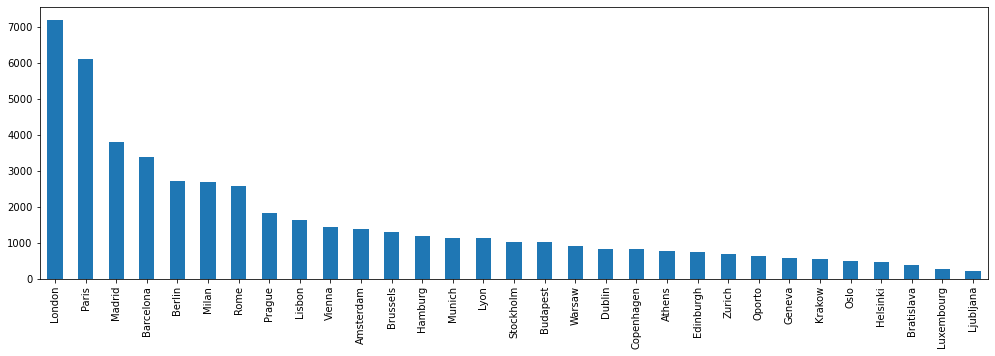

In [17]:
# посмотрим сколько ресторанов находится в каждом городе
plt.rcParams['figure.figsize'] = (17, 5)
df.city.value_counts().plot(kind='bar')

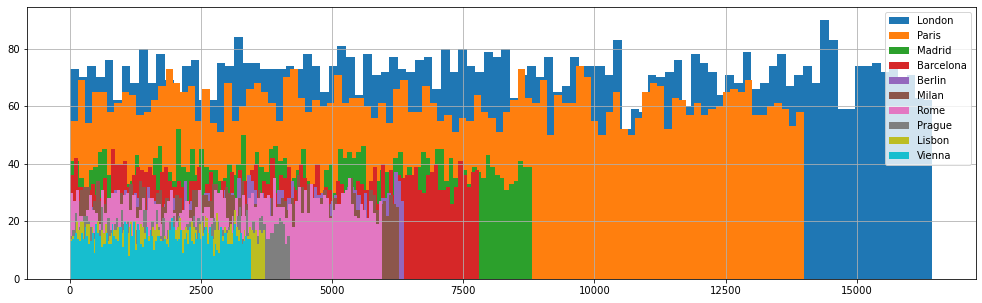

In [18]:
# проанализируем как распределение по городам влияет  
# на переменную ranking
plt.rcParams['figure.figsize'] = (17, 5)
for x in (df.city.value_counts()[:10]).index:
    df.ranking[df.city==x].hist(bins=100)
    plt.legend((df.city.value_counts()[:10]).index)
plt.show()

По данному графику можно увидеть, что чем больше ресторанов в городе, тем больший разброс значений переменной ranking. Можно предположить, что количество ресторанов в городе также может оказывать влияние на рейтинг на сайте TripAdvisor.
Поэтому добавим колонку city_rest, которая будет показывать какое количество ресторанов всего в городе.

In [19]:
# создадим переменную с количеством ресторанов по городам
count_rest = df.city.value_counts()

In [20]:
def new_row(line, value_list):
    """функция возвращает количество ресторанов исходя из города, в котором находится ресторан"""
    city_rest = 0
    for city in value_list.index:
        if city==line:
            city_rest=value_list[city]
    return city_rest

In [21]:
# создаем колонку и применяем к ней функцию
df['city_rest'] = df.city.apply(lambda x: new_row(x, count_rest))

Поскольку количество ресторанов в городе влияет на рейтинг, предположим, что и количество жителей в городе также оказывают влияние на рейтинг. Поэтому создадим переменную с количеством жителей города, чтобы использовать эту колонку в обучении модели.

In [22]:
# по данным eurostat (включая агломерацию крупных городов)
popul = [8866541, 9845879, 5012504, 3701270, 3669491, 3606653, 
         4342212, 1324277, 1872036, 1921953, 872757, 1215289, 
         1847253, 1484226, 1076752, 949761, 1752286, 1793579, 
         1325700, 615993, 3181872, 507170, 409241, 955864, 
         407605, 779115, 673469, 1154967, 432864, 626108, 508607]
citi = count_rest.index
population = pd.Series(data = popul, index=citi)

In [23]:
# создаем колонку и применяем к ней функцию
df['city_population'] = df.city.apply(lambda x: new_row(x, population))

In [24]:
# добавим колонку с туристами по городам по данным Euromonitor за 2019г
tourists = [19559.9, 19087.9, 5597.8, 7016.6, 6195.8, 
6604.4, 10317.0, 9150.9, 3639.9, 6634.7, 
8835.4, 4276.0, 6783.0, 4205.5, 6000.0, 
2721.9, 4025.4, 2827.0, 5462.1, 3185.6,
6301.3, 5300.0, 4199.7, 2491.7, 2507.8, 
3300.0, 1500.0, 947.8, 754.8, 1139.0, 1127.9]

tourist = pd.Series(data=tourists, index = citi)

# создаем колонку и применяем к ней функцию
df['city_tourists'] = df.city.apply(lambda x: new_row(x, tourist))

In [25]:
# создадим dummy-переменные по всем городам, где есть рестораны
df_city = pd.get_dummies(df.city, dummy_na=True)

In [26]:
# присоединим созданные переменные к нашему датафрейму
df = df.join(df_city)

Создадим еще переменные, которые покажут в какой части Европы находится ресторан

In [27]:
# выявим рестораны южной части Европы
southern_europe = []
se = ['Athens', 'Barcelona', 'Madrid', 'Milan', 'Rome', 'Lisbon', 'Oporto']

for row in df.city:
    if row in se:
        southern_europe.append(1)
    else:
        southern_europe.append(0)

df['southern_europe'] = southern_europe

In [28]:
# выявим рестораны центральной Европы
central_europe = []
ce = ['Bratislava', 'Budapest', 'Warsaw', 'Krakow', 'Ljubljana', 'Prague']  

for row in df.city:
    if row in ce:
        central_europe.append(1)
    else:
        central_europe.append(0)
        
df['central_europe'] = central_europe

In [29]:
# выявим рестораны Западной Европы
western_europe = []
we = ['Berlin', 'Hamburg', 'Munich', 'Vienna', 'Amsterdam', 'Brussels', 'Geneva', 'Lyon', 'Paris', 'Luxembourg', 'Zurich']  

for row in df.city:
    if row in we:
        western_europe.append(1)
    else:
        western_europe.append(0)
        
df['western_europe'] = western_europe

In [30]:
# выявим рестораны Северной Европы
northern_europe = []
ne = ['Copenhagen', 'Dublin', 'Edinburgh', 'Helsinki', 'London', 'Oslo', 'Stockholm'] 

for row in df.city:
    if row in ne:
        northern_europe.append(1)
    else:
        northern_europe.append(0)
        
df['northern_europe'] = northern_europe

## Обрабатываем типы кухонь

Проведем анализ колонки с типами кухонь, предлагаемых ресторанами. Вначале посчитаем сколько кухонь предлагает каждый ресторан.

In [31]:
# посмотрим описание признака
display(df['cuisine_style'].describe())

count           38410
unique          10731
top       ['Italian']
freq             1332
Name: cuisine_style, dtype: object

In [32]:
# разделим типы кухонь в списки, посчитаем количество в каждом списке
# и значение запишем в новую колонку cuisine_count
df['cuisine_style'] = df['cuisine_style'].str.strip("[]").str.split(', ')
df['cuisine_style'].fillna("'Unknown'", inplace=True)
df['cuisine_count'] = df['cuisine_style'].apply(lambda x: len(x))

In [33]:
# для поиска популярных кухонь создадим отдельную переменную style
style = df.explode('cuisine_style')

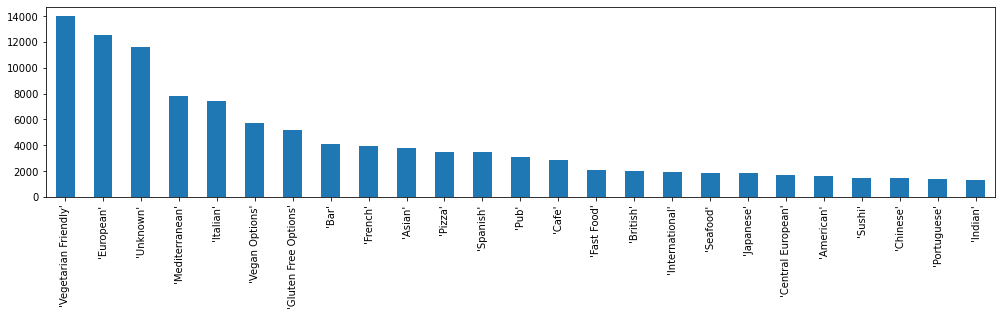

In [34]:
# посмотрим на распределение типов кухонь по ресторанам
plt.rcParams['figure.figsize'] = (17, 3.5)
style['cuisine_style'].value_counts()[:25].plot(kind='bar')

In [35]:
# посмотрим на количество кухонь по городам
city_cuisines = style.groupby(['city'])['cuisine_style'].nunique()
city_cuisines

city
Amsterdam      86
Athens         64
Barcelona      96
Berlin         99
Bratislava     60
Brussels       81
Budapest       75
Copenhagen     77
Dublin         72
Edinburgh      67
Geneva         63
Hamburg        76
Helsinki       72
Krakow         66
Lisbon         74
Ljubljana      56
London        111
Luxembourg     60
Lyon           74
Madrid         94
Milan          84
Munich         78
Oporto         48
Oslo           65
Paris         103
Prague         83
Rome           81
Stockholm      78
Vienna         90
Warsaw         75
Zurich         78
Name: cuisine_style, dtype: int64

In [36]:
# используя функцию new_row создадим новый признак с количеством кухонь в городе
df['city_cuisine'] = df.city.apply(lambda x: new_row(x, city_cuisines))

In [37]:
# посмотрим на самую популярную кухню в городе
city_styles = style.groupby(['city'])['cuisine_style'].value_counts()
city_styles

city       cuisine_style        
Amsterdam  'European'               618
           'Vegetarian Friendly'    587
           'Dutch'                  358
           'Bar'                    236
           'Vegan Options'          232
                                   ... 
Zurich     'Nepali'                   1
           'Persian'                  1
           'Portuguese'               1
           'Singaporean'              1
           'Tibetan'                  1
Name: cuisine_style, Length: 2386, dtype: int64

Как видим в каждом городе самая популярная кухня отличается. Если в общем по ресторанам самая популярная кухня Vegetarian Friendly, то в большинстве городов, если смотреть по отдельности, это European. Поэтому проведем замену пропусков по стилям кухонь в соответствии с самым популярным стилем в каждом городе.

In [38]:
# первоначально проверим какие самые популярные варианты кухонь в тех городах, где на первом месте неизвестный вариант
print(city_styles['Bratislava'].index[1])
print(city_styles['Hamburg'].index[1])
print(city_styles['Berlin'].index[1])

'European'
'Vegetarian Friendly'
'Vegetarian Friendly'


In [39]:
# определим скписок городов для замены значений по городам
cities = df.city.unique()
cities

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw',
       'Oporto', 'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

In [40]:
# создадим датафрейм с признаками: город и его популярная кухня
towns_lists=[]
cuisine_lists = []

for town in cities:
    towns_lists.append(town)
    towns = style[style.city==town].cuisine_style.value_counts()
    max_style = towns.index[0]
    cuisine_lists.append(max_style)
    
popular_cuisine = {'towns':towns_lists, 'cuisin':cuisine_lists}
popular_cuisines = pd.DataFrame(popular_cuisine)

# заменим значения там, где на первом месте неизвестные значения
popular_cuisines.loc[4].cuisin="'European'"
popular_cuisines.loc[11].cuisin="'Vegetarian Friendly'"
popular_cuisines.loc[20].cuisin="'Vegetarian Friendly'"

popular_cuisines


,towns,cuisin
0,Paris,'French'
1,Helsinki,'European'
2,Edinburgh,'Vegetarian Friendly'
3,London,'Vegetarian Friendly'
4,Bratislava,'European'
5,Lisbon,'European'
6,Budapest,'European'
7,Stockholm,'European'
8,Rome,'Italian'
9,Milan,'Italian'


In [41]:
# создадим новый признак со стилями кухонь, где будут заменены пустые значения
new_styles = []

for ind in df.index:
    if df.loc[ind].cuisine_style=="'Unknown'":
        new_styles.append(popular_cuisines[popular_cuisines.towns==df.loc[ind].city].cuisin.to_list())
    else:
        new_styles.append(df.loc[ind].cuisine_style)
        
df['cuisine_styles']=new_styles

In [42]:
# удалим старую колонку, чтобы не путаться
df = df.drop(['cuisine_style'], axis=1)

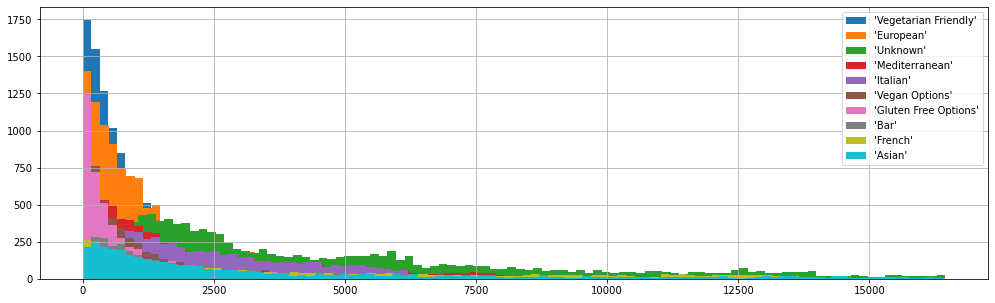

In [43]:
# проанализируем как распределение по кухням влияет  
# на переменную ranking
plt.rcParams['figure.figsize'] = (17, 5)
for x in (style.cuisine_style.value_counts()[:10]).index:
    style.ranking[style.cuisine_style==x].hist(bins=100)
    plt.legend(style.cuisine_style.value_counts()[:10].index)
plt.show()

Создадим новые dummy-переменные по самым популярным 25 кухням, которые встречаются больше чем в 1000 ресторанах

In [44]:
# создадим список cuisine_list с популярными кухнями
cuisine_list = pd.Series(style['cuisine_style'].value_counts())
#cuisine_list = cuisine_list[cuisine_list>=1000]

In [45]:
# создадим колонки с кухнями и проверим каждый ресторан на совпадение с кухней
for cuisine in cuisine_list.index:
    famous_cuisine = []
    for row in df.cuisine_styles:
        if cuisine in row:
            famous_cuisine.append(1)
        else:
            famous_cuisine.append(0)
    df[cuisine[1:-1]] = famous_cuisine

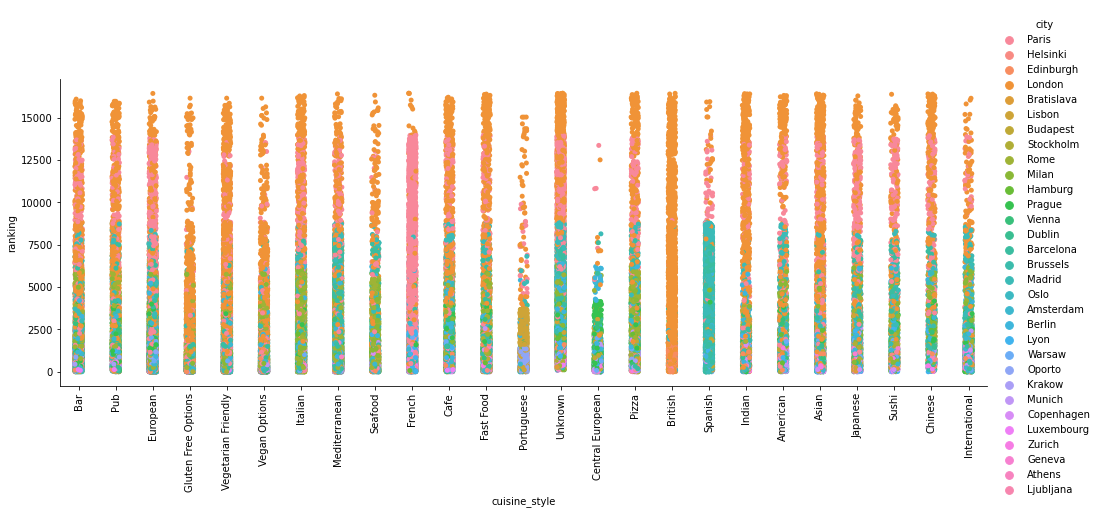

In [46]:
# проверим как ранжирование ресторанов по городам зависит от типа кухни
# изначально уберем кавычки в типах кухни
style['cuisine_style'] =style['cuisine_style'].apply(lambda x: x[1:-1])
cuisine_df =style.query("cuisine_style in ['Vegetarian Friendly', \
                        'European', 'Unknown', 'Mediterranean','Italian', \
                        'Vegan Options', 'Gluten Free Options', 'Bar', \
                        'French','Asian', 'Pizza', 'Spanish', 'Pub', \
                        'Cafe', 'Fast Food', 'British', 'International', \
                        'Seafood', 'Japanese', 'Central European', 'American',\
                        'Sushi', 'Chinese', 'Portuguese', 'Indian']")

plt.rcParams['figure.figsize'] = (17, 8)
sns.catplot(data = cuisine_df, x = 'cuisine_style', y = 'ranking', hue = 'city', height=5, aspect=2.8)
plt.xticks(rotation=90)                    
plt.show()

На графике заметно выделяется небольшой разброс значений ranking по типу кухни Central European независимо от города и страны, в которых находится ресторан

## Проанализируем переменную Ranking

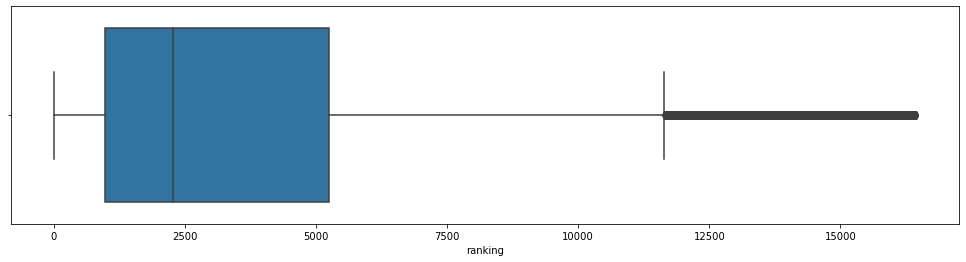

In [47]:
# посмотрит на распределение значений по boxplot
plt.rcParams['figure.figsize'] = (17, 4)
sns.boxplot(df.ranking)

Хотя выбросы на графике есть, но учитывая их распределение и то что количество ресторанов в разных городах сильно отличается, данные значения оставим как есть.

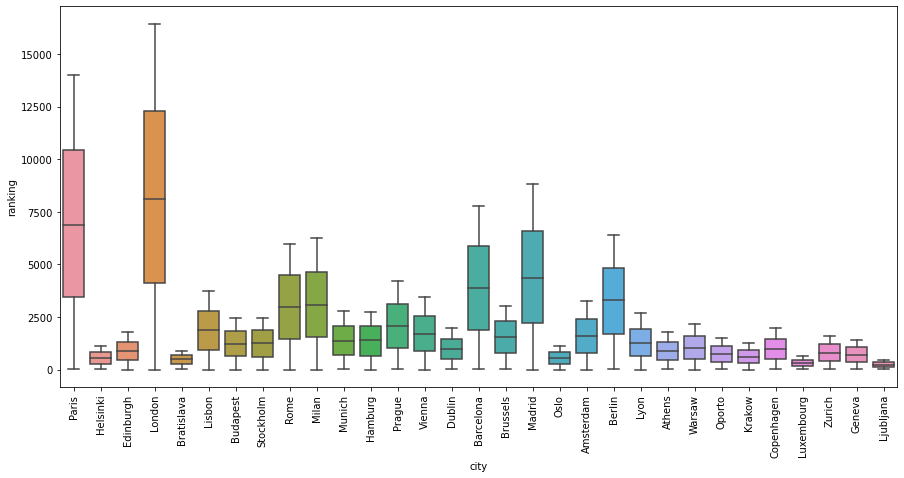

In [48]:
# построив график значений ranking по городам, можно увидеть, что выбрасов нет
f, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = df.city, y = df.ranking)
plt.xticks(rotation=90)
plt.show()

## Обрабатываем колонку с ценовым диапазоном

Проведем анализ ценового диапазона ресторанов. Вначале переименуем значения цен в удобные названия, затем заполним пустые строки наиболее популярным значением. Затем создадим dummy-переменные по ценовому диапазону.

In [49]:
df.price_range.replace({'$$ - $$$': 2.5, '$$$$':4, '$': 1}, inplace=True)

In [50]:
sns_price = pd.DataFrame(df.groupby(['price_range'])['city'].value_counts())
sns_price.rename(columns = {'city': 'city_count'}, inplace=True)
reset_price = sns_price.reset_index()
reset_price

,price_range,city,city_count
0,1.0,London,1269
1,1.0,Paris,729
2,1.0,Rome,645
3,1.0,Barcelona,592
4,1.0,Milan,523
...,...,...,...
88,4.0,Dublin,17
89,4.0,Bratislava,14
90,4.0,Krakow,13
91,4.0,Luxembourg,11


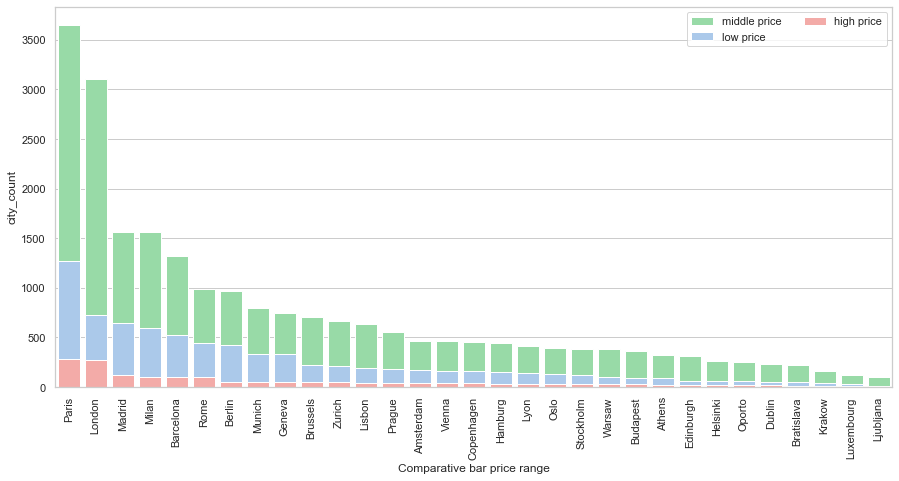

In [51]:
# Посмотрим на количество ресторанов в разных ценовых диапазонах по городам
sns_price = pd.DataFrame(df.groupby(['price_range'])['city'].value_counts())
sns_price.rename(columns = {'city': 'city_count'}, inplace=True)
reset_price = sns_price.reset_index()

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15,7))

sns.set_color_codes("pastel")
sns.barplot(data = reset_price[reset_price.price_range==2.5], 
            x = 'city', y = 'city_count', label="middle price", color="g")

sns.barplot(data = reset_price[reset_price.price_range==1.0], 
            x = 'city', y = 'city_count', label="low price", color="b")

sns.barplot(data = reset_price[reset_price.price_range==4.0], 
            x = 'city', y = 'city_count', label="high price", color="r")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Comparative bar price range")

plt.xticks(rotation=90)
plt.show()

Во всех городах значительное большинство ресторанов находится в среднем ценовом диапазоне. Поэтому проведем замену пропусков на средний ценовой диапазон.

In [52]:
df.price_range.fillna(2.5, inplace=True)

## Анализируем колонку с отзывами

In [53]:
df.reviews.describe()

count        49998
unique       41857
top       [[], []]
freq          8112
Name: reviews, dtype: object

Текстовую колонку с отзывами проанализируем на количество положительных слов. Для этого выбирем наиболее часто встречаемые слова из положительных отзывов (переменная positive_review). Затем разделим все отзывы по каждому ресторану на отдельные слова и посчитаем сколько совпадений с переменной positive_review.

In [54]:
positive_review = ['good', 'delicious', 'best', 'excellent', 'nice', 'great', 
                   'lovely', 'gem', 'liked', 'brilliant', 'amazing', 'fantastic',
                   'tasty', 'cool', 'perfect', 'awesome']

In [55]:
# узнаем индексы пустых строк
df[df.reviews.isna()==True].index

Int64Index([8168, 9608], dtype='int64')

In [56]:
# проведем замену пустых строк, дату отзыва укажем наиболее часто встречаемую (уже известную)
df.reviews.loc[8168]="'text unknown', '['01/03/2018']'"
df.reviews.loc[9608]="'text unknown', '['01/03/2018']'"

C:\Users\Yulia\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
# для сравнения слов выведем информацию с отзывами в отдельную переменную texts 
# df.reviews оставим без изменений пока не обработаем даты
text = df.reviews.copy()

# убирем лишние символы и разделим слова
text1 = text.str.replace('[', '')
text2 = text1.str.replace(']', '')
text3 = text2.str.replace(',', '')
text4 = text3.str.replace("'", '')
texts = text4.str.split(' ')

In [58]:
# сравниваем слова в отзывах с положительными словами переменной positive_review
positive = []
for row in texts.index:
    lines = 0
    for word in texts[row]:
        if word.lower() in positive_review:
            lines += 1
        else:
            lines += 0
    positive.append(lines)

In [59]:
# полученный результат с количеством положительных слов в отзывах
# помещаем в датафрейм в колонку count_positive
df['count_positive'] = positive

In [60]:
# посчитаем количество слов, включая дату в отзывах и создадим переменную count_words
df['count_words'] = texts.apply(lambda x: len(x))

Проанализируем даты отзывов. Для этого вначале переведем даты в тип datetime

In [61]:
# создаем паттерн для поиска нужных дат
pat= re.compile('[0-9]+/[0-9]+/[0-9]+')

In [62]:
# отделим отзывы и даты по запятым
df.reviews = df.reviews.str.split(',')

In [63]:
# заменим пустые строки нейтральным текстом и самой частой датой отзывов
df.reviews.loc[8168]="'text unknown', '['01/03/2018']'"
df.reviews.loc[9608]="'text unknown', '['01/03/2018']'"

In [64]:
# вначале выявим самую последнюю дату отзыва и сравним сколько дней
# отделяет последний отзыв ресторана от самого свежего
data1 = []

for line in df.reviews:
    for item in line:
        data1.append(pat.findall(item))

In [65]:
# переведем полученные данные в строковые значения
vd = pd.Series(data1)
vd = vd.astype('str')

In [66]:
# удалим неправильное значение, которое мешает обработке дат
# поскольку поиск паттерна нашел дату в тексте самого отзыва
print(vd[vd=="['29/9/2016']"].keys())
print(vd[vd=="['21/10/17']"].keys())
print(vd[vd=="['30/5/2017']"].keys())

Int64Index([121431], dtype='int64')
Int64Index([8022], dtype='int64')
Int64Index([13900], dtype='int64')


In [67]:
vd = vd.drop([121431])
vd = vd.drop([8022])
vd = vd.drop([13900])

In [68]:
from datetime import datetime, timedelta

In [69]:
# переводим данные в дату
all_date = []

for day in vd:
    if day=='[]':
        pass
    else:
        all_date.append(datetime.strptime(day, "['%m/%d/%Y']"))

In [70]:
# находим самую свежую дату отзыва
all_time = pd.Series(all_date)
max_date = all_time.max()

In [71]:
max_date

Timestamp('2018-02-26 00:00:00')

In [72]:
# создаем список с датами отзывов по каждому ресторану
data2 = []

for line in df.reviews:
    d2 = []
    for item in line[-2:]:
        d2.append(pat.findall(item))
    data2.append(d2)
    
len(data2)

50000

In [73]:
# создаем датафрейм для работы с датами
data2time = pd.DataFrame(data2, columns = ['a', 'b'])

In [74]:
data2time = data2time.astype('str', copy=True)

In [75]:
# заменяем пустые значения на условную дату
data2time.replace('[]', "['01/01/1900']", inplace=True)

In [76]:
# создадим снова датафрейм с заполненными датами
newdata2 = []

for line in data2time:
    newl = []
    for l in data2time[line]:
        if l=='[]':
            pass
        else:
            newl.append(datetime.strptime(l, "['%m/%d/%Y']"))
    newdata2.append(newl)
        
len(newdata2)

2

In [77]:
period = pd.DataFrame({'rev_date1':newdata2[0], 'rev_date2':newdata2[1]})
period.head()

,rev_date1,rev_date2
0,1900-01-01,1900-01-01
1,2017-12-05,2017-10-29
2,2017-12-28,2017-12-06
3,2017-12-06,2017-11-22
4,2018-02-08,2018-01-24


In [78]:
# создадим колонку с разницей дней между датами отзывов
period['date1_date2'] = period['rev_date1'] - period['rev_date2']

In [79]:
# создадим колонку с количеством дней между самой свежей датой и датой последнего отзыва
period['max_date1'] =  max_date - period['rev_date1']

In [80]:
# аналогично создадим колонку с количеством дней между более ранней датой и датой последнего отзыва
period['max_date2'] =  max_date - period['rev_date2']

In [81]:
# знакомимся с полученными данными
period.head()

,rev_date1,rev_date2,date1_date2,max_date1,max_date2
0,1900-01-01,1900-01-01,0 days,43155 days,43155 days
1,2017-12-05,2017-10-29,37 days,83 days,120 days
2,2017-12-28,2017-12-06,22 days,60 days,82 days
3,2017-12-06,2017-11-22,14 days,82 days,96 days
4,2018-02-08,2018-01-24,15 days,18 days,33 days


In [82]:
# необходимо исключить неправильные значения, созданные из-за пропусков
# и заменим их на медианное значение
# для этого создадим переменную с максимальным количеством дней
big = datetime.strptime('01/01/2000', '%m/%d/%Y') - datetime.strptime('01/01/1900', '%m/%d/%Y')

In [83]:
# найдем медианное значение колонки max_date1 и max_date2
median_time = period.max_date1[period.max_date1<=big].median()
median_time2 = period.max_date2[period.max_date2<=big].median()

In [84]:
# заменим неправильное количество дней в колонке max_date1 и max_date2 на медиану
period.max_date1[period.max_date1>=big]=median_time
period.max_date2[period.max_date2>=big]=median_time2

<ipython-input-84-74b8b0bfbdad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period.max_date1[period.max_date1>=big]=median_time
<ipython-input-84-74b8b0bfbdad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period.max_date2[period.max_date2>=big]=median_time2


In [85]:
# также в колонке date1_date2 заменим 0, 
# который получился из-за заполнения пустых строк условной датой, на медиану
# для этого создадим переменную с неправильным значением
zero = period.date1_date2[3]

In [86]:
# найдем медиану колонки date1_date2
median_period = period.date1_date2[period.date1_date2 > zero].median()

In [87]:
# проведем замену
period.date1_date2[period.date1_date2<=zero]=median_period

<ipython-input-87-5dfffcc198b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period.date1_date2[period.date1_date2<=zero]=median_period


In [88]:
period.head()

,rev_date1,rev_date2,date1_date2,max_date1,max_date2
0,1900-01-01,1900-01-01,96 days,147 days,250 days
1,2017-12-05,2017-10-29,37 days,83 days,120 days
2,2017-12-28,2017-12-06,22 days,60 days,82 days
3,2017-12-06,2017-11-22,96 days,82 days,96 days
4,2018-02-08,2018-01-24,15 days,18 days,33 days


In [89]:
# присоединим полученный датафрейм к первоначальным данным
df = df.join(period)

In [90]:
# заменим тип значений на integer в полученных колонках с разницей в датах
df.max_date1 = df.max_date1.dt.days 
df.max_date2 = df.max_date2.dt.days 
df.date1_date2 = df.date1_date2.dt.days

In [91]:
# дополним показатели номером месяца и годом  в котором был сделан самый ранний отзыв
df['review_month2'] = df.rev_date2.dt.month
df['review_year2'] = df.rev_date2.dt.year

In [92]:
# дополним показатели номером месяца и годом  в котором был сделан последний отзыв
df['review_month1'] = df.rev_date1.dt.month
df['review_year1'] = df.rev_date1.dt.year

In [93]:
# создадим колонку с указанием был ли отзыв в выходной день
# для этого узнаем день недели, а затем создадим колонку weekend 
# с показателями 0 - будни и 1 - выходные
df['review_weekday1'] = df.rev_date1.dt.weekday
df['review_weekday2'] = df.rev_date2.dt.weekday

weekend = []
for line in df.index:
    if df.loc[line]['review_weekday1'] >=5 or df.loc[line]['review_weekday2'] >= 5:
        weekend.append(1)
    else:
        weekend.append(0)

df['weekend'] = weekend

In [94]:
df.head()

,restaurant_id,city,ranking,price_range,number_reviews,reviews,URL_TA,ID_TA,sample,rating,...,date1_date2,max_date1,max_date2,review_month2,review_year2,review_month1,review_year1,review_weekday1,review_weekday2,weekend
0,id_0,Paris,12963.0,2.5,4.0,"[[[], []]]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,96,147,250,1,1900,1,1900,0,0,0
1,id_1,Helsinki,106.0,2.5,97.0,"[[['Very good reviews!', 'Fine dining in Haka...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,37,83,120,10,2017,12,2017,1,6,1
2,id_2,Edinburgh,810.0,2.5,28.0,"[[['Better than the Links', 'Ivy Black'], ['...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,22,60,82,12,2017,12,2017,3,2,0
3,id_3,London,1669.0,4.0,202.0,"[[['Most exquisite', 'Delicious and authentic...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,96,82,96,11,2017,12,2017,2,2,0
4,id_4,Bratislava,37.0,4.0,162.0,"[[['Always the best in bratislava', 'Very goo...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,15,18,33,1,2018,2,2018,3,2,0


## Обработаем данные по количеству отзывов

Посмотрим на количество отзывов в зависимости от типа кухни.

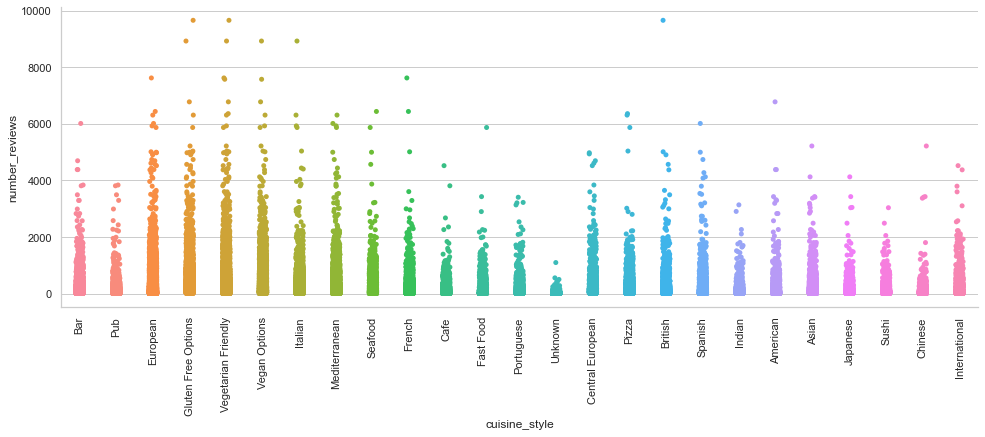

In [95]:
sns.catplot(data = cuisine_df, x = 'cuisine_style', y = 'number_reviews',  height=5, aspect=2.8)
plt.xticks(rotation=90)                    
plt.show()

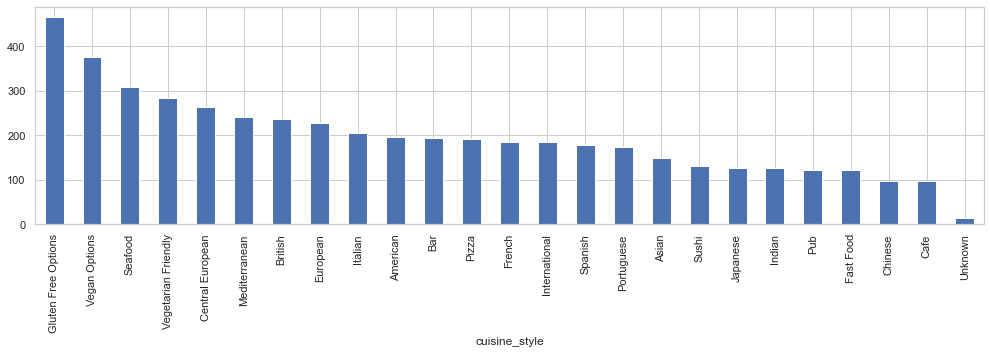

In [96]:
style_num_rev = cuisine_df.groupby(['cuisine_style'])['number_reviews'].mean()
style_num_rev.sort_values(ascending=False).plot(kind='bar')

Больше всего отзывов встречается в тех ресторанах, где присутствует вегетарианская кухня, а также морская кухня.

Посмотрим на среднее значение количества отзывов по ресторанам разных городов.

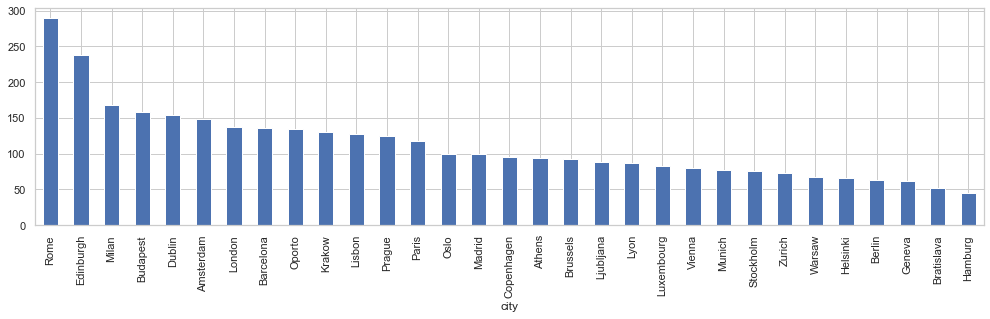

In [97]:
mean_num_rev = df.groupby(['city'])['number_reviews'].mean()
mean_num_rev.sort_values(ascending=False).plot(kind='bar')

Как видим среднее значение сильно отличается в разных городах. Больше всего отзывов встречается в ресторанах Рима и Эдинбурга.

In [98]:
# проведем замену пустых полей в колонке number_review в зависимости от города
df['numrev_isna'] = df.number_reviews.isna()
df['numrev_isna']=df['numrev_isna'].astype('str')
new_val = []
for indexes in df.index:
    if df.loc[indexes].numrev_isna=='True':
        new_val.append(round(mean_num_rev[df.loc[indexes].city]))
    else:
        new_val.append(df.loc[indexes].number_reviews)
df['number_review'] = new_val

In [99]:
# выполним замену
df.number_reviews = df.number_reviews.fillna(df.number_reviews.mean())
df = df.drop(['number_reviews'], axis=1)

Получим полиноминальные переменные, например между признаками 'ranking', 'number_reviews'

In [100]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(df[['ranking', 'number_review']])
poly_features
poly_features.shape

(50000, 6)

In [101]:
# создадим датафрейм с новыми переменными
poly_df = pd.DataFrame(poly_features)
poly_df

,0,1,2,3,4,5
0,1.0,12963.0,4.0,168039369.0,51852.0,16.0
1,1.0,106.0,97.0,11236.0,10282.0,9409.0
2,1.0,810.0,28.0,656100.0,22680.0,784.0
3,1.0,1669.0,202.0,2785561.0,337138.0,40804.0
4,1.0,37.0,162.0,1369.0,5994.0,26244.0
...,...,...,...,...,...,...
49995,1.0,500.0,79.0,250000.0,39500.0,6241.0
49996,1.0,6341.0,542.0,40208281.0,3436822.0,293764.0
49997,1.0,1652.0,4.0,2729104.0,6608.0,16.0
49998,1.0,641.0,70.0,410881.0,44870.0,4900.0


In [102]:
# переименуем колонку с произведением признаков 'ranking'и 'number_reviews'
poly_df.rename(columns={4:'rank_numrev'}, inplace=True)

In [103]:
# присоединим полученные переменные к первоначальному датафрейму
df = df.join(poly_df['rank_numrev'])

## Посмотрим на признаки URL_TA и ID_TA

In [104]:
df['URL_TA'].describe()

count                                                 50000
unique                                                49963
top       /Restaurant_Review-g187514-d4914988-Reviews-Xi...
freq                                                      2
Name: URL_TA, dtype: object

In [105]:
df['ID_TA'].describe()

count         50000
unique        49963
top       d11921719
freq              2
Name: ID_TA, dtype: object

In [106]:
# чуть меньше 40 значений имеют повторения, что странно при уникальности каждого ресторана
# посмотрим на один пример с такими ресторанами

In [107]:
df[df.ID_TA=='d10440367']

,restaurant_id,city,ranking,price_range,reviews,URL_TA,ID_TA,sample,rating,restaurant_chain,...,review_month2,review_year2,review_month1,review_year1,review_weekday1,review_weekday2,weekend,numrev_isna,number_review,rank_numrev
8551,id_8551,Madrid,1206.0,2.5,"[[['Delicious soup', 'My weekly treat'], ['0...",/Restaurant_Review-g187514-d10440367-Reviews-B...,d10440367,0,0.0,1.0,...,7,2017,3,2017,6,6,1,False,70.0,84420.0
23576,id_1277,Madrid,1279.0,2.5,"[[['Delicious soup', 'My weekly treat'], ['0...",/Restaurant_Review-g187514-d10440367-Reviews-B...,d10440367,1,4.0,1.0,...,7,2017,3,2017,6,6,1,False,70.0,89530.0


In [108]:
# похоже что речь идет об одном и том же ресторане, но с разным значением переменной ranking
# поскольку таких строк крайне мало относительно общего количества, оставим их без изменений

## Посмотрим на распределение целевой переменной Rating

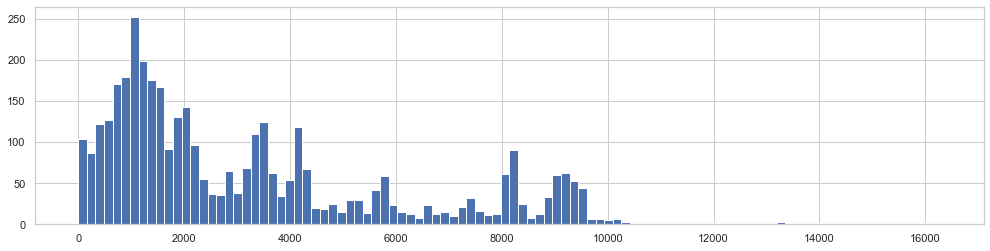

In [109]:
df_main['Ranking'][df_main['Rating'] == 5].hist(bins=100)

# Проведем корреляционный анализ признаков

In [110]:
colum = df.columns
for item in colum:
    print(item)

restaurant_id
city
ranking
price_range
reviews
URL_TA
ID_TA
sample
rating
restaurant_chain
city_rest
city_population
city_tourists
Amsterdam
Athens
Barcelona
Berlin
Bratislava
Brussels
Budapest
Copenhagen
Dublin
Edinburgh
Geneva
Hamburg
Helsinki
Krakow
Lisbon
Ljubljana
London
Luxembourg
Lyon
Madrid
Milan
Munich
Oporto
Oslo
Paris
Prague
Rome
Stockholm
Vienna
Warsaw
Zurich
nan
southern_europe
central_europe
western_europe
northern_europe
cuisine_count
city_cuisine
cuisine_styles
Vegetarian Friendly
European
Unknown
Mediterranean
Italian
Vegan Options
Gluten Free Options
Bar
French
Asian
Pizza
Spanish
Pub
Cafe
Fast Food
British
International
Seafood
Japanese
Central European
American
Sushi
Chinese
Portuguese
Indian
Middle Eastern
Thai
Wine Bar
German
Halal
Greek
Healthy
Fusion
Czech
Steakhouse
Barbecue
Contemporary
Soups
Eastern European
Vietnamese
Grill
Gastropub
Turkish
Mexican
South American
Delicatessen
Austrian
Polish
Scandinavian
Hungarian
Lebanese
Diner
Latin
Dutch
Irish
Street Foo

In [111]:
df_cor = df.drop(['sample'], axis=1).corr()

# посмотрим какие признаки больше связаны с искомой переменной rating
pd.set_option('display.max_rows', 185) # показывать больше строк
pd.set_option('display.max_columns', 185) # показывать больше колонок
df_cor['rating'].sort_values(ascending=False)

rating                 1.000000
restaurant_chain       0.150831
count_positive         0.038286
Vegetarian Friendly    0.035599
Vegan Options          0.029015
Rome                   0.027527
Gluten Free Options    0.025691
Healthy                0.023766
Delicatessen           0.021144
Mediterranean          0.018614
Wine Bar               0.017776
Athens                 0.016852
European               0.015704
Vietnamese             0.013444
Berlin                 0.012834
Scottish               0.012164
Cafe                   0.012097
Contemporary           0.011498
number_review          0.011489
review_month2          0.011232
review_year2           0.011194
International          0.011148
Lebanese               0.011008
Polish                 0.010758
Hawaiian               0.010680
Russian                0.010228
Vienna                 0.010188
Central European       0.009872
Oporto                 0.009654
Greek                  0.009632
Central Asian          0.009590
cuisine_

Согласно корреляционному анализу, наибольшая связь переменной rating с переменными restaurant_chain, ranking, rank_numrev, count_positive, Vegetarian Friendly. Таким образом, оценка рестарана зависит от тогоотносится ли он к сети ресторанов, от места, которое данный рестаран занимает в городе, количества позитивных отзывов, наличия вегетаринской кухни, а также при обучениии модели можно использовать и полиноминальный признак rank_numrev произведения переменных ranking, number_reviews.

In [112]:
# просмотрим какие признаки наиболее зависимы между собой
for column in df_cor:
    print(df_cor[column].sort_values(ascending=False)[1:4]) 
    print(df_cor[column].sort_values()[:3])

city_rest          0.709012
city_population    0.685906
city_tourists      0.654882
Name: ranking, dtype: float64
restaurant_chain      -0.502592
European              -0.337096
Gluten Free Options   -0.216674
Name: ranking, dtype: float64
cuisine_count          0.181928
Gluten Free Options    0.139514
European               0.130216
Name: price_range, dtype: float64
Fast Food   -0.277461
Cafe        -0.120614
Pizza       -0.083239
Name: price_range, dtype: float64
restaurant_chain       0.150831
count_positive         0.038286
Vegetarian Friendly    0.035599
Name: rating, dtype: float64
ranking       -0.109897
rank_numrev   -0.065856
max_date2     -0.034392
Name: rating, dtype: float64
rating             0.150831
southern_europe    0.130706
European           0.110975
Name: restaurant_chain, dtype: float64
ranking         -0.502592
city_tourists   -0.313174
city_rest       -0.309556
Name: restaurant_chain, dtype: float64
city_population    0.967684
city_tourists      0.925745
city_cui

Name: British, dtype: float64
Central European    0.099795
Hungarian           0.087249
European            0.075466
Name: International, dtype: float64
ranking           -0.070473
city_population   -0.068955
city_rest         -0.063934
Name: International, dtype: float64
Mediterranean    0.188030
Rome             0.133283
Milan            0.128036
Name: Seafood, dtype: float64
ranking          -0.075019
western_europe   -0.059372
Paris            -0.046390
Name: Seafood, dtype: float64
Sushi      0.704750
Asian      0.357989
Chinese    0.113012
Name: Japanese, dtype: float64
European        -0.128328
Italian         -0.081096
Mediterranean   -0.077944
Name: Japanese, dtype: float64
Eastern European    0.411028
German              0.296361
Czech               0.281386
Name: Central European, dtype: float64
city_population   -0.144618
city_rest         -0.141849
ranking           -0.138600
Name: Central European, dtype: float64
Fast Food    0.186107
Barbecue     0.132491
Bar          0.

Name: Taiwanese, dtype: float64
Nepali       0.218601
Asian        0.065326
Mongolian    0.041061
Name: Tibetan, dtype: float64
European          -0.016505
northern_europe   -0.011264
Mediterranean     -0.010373
Name: Tibetan, dtype: float64
Middle Eastern    0.158184
Halal             0.080823
Persian           0.064951
Name: Afghani, dtype: float64
European          -0.015926
southern_europe   -0.013761
French            -0.008302
Name: Afghani, dtype: float64
Caribbean    0.085384
Afghani      0.036517
Cuban        0.033453
Name: Cajun & Creole, dtype: float64
southern_europe   -0.013761
European          -0.012233
Italian           -0.010490
Name: Cajun & Creole, dtype: float64
Arabic            0.106552
Middle Eastern    0.102293
Halal             0.049061
Name: Egyptian, dtype: float64
price_range   -0.015400
European      -0.009139
French        -0.007827
Name: Egyptian, dtype: float64
Central American    0.124958
Mexican             0.109263
Barbecue            0.043675
Name: S

southern_europe   -0.127114
ranking           -0.104974
Madrid            -0.104865
Name: review_month2, dtype: float64
review_year1     0.716747
count_words      0.671009
review_month2    0.593227
Name: review_year2, dtype: float64
southern_europe   -0.171024
Madrid            -0.158933
cuisine_count     -0.133725
Name: review_year2, dtype: float64
review_year1    0.650243
count_words     0.483768
review_year2    0.468103
Name: review_month1, dtype: float64
cuisine_count     -0.124064
southern_europe   -0.120129
Madrid            -0.092701
Name: review_month1, dtype: float64
count_words      0.741055
review_year2     0.716747
review_month1    0.650243
Name: review_year1, dtype: float64
cuisine_count     -0.165772
southern_europe   -0.158821
ranking           -0.152013
Name: review_year1, dtype: float64
review_year1    0.614225
weekend         0.563952
count_words     0.454477
Name: review_weekday1, dtype: float64
cuisine_count     -0.106269
southern_europe   -0.094751
Madrid          

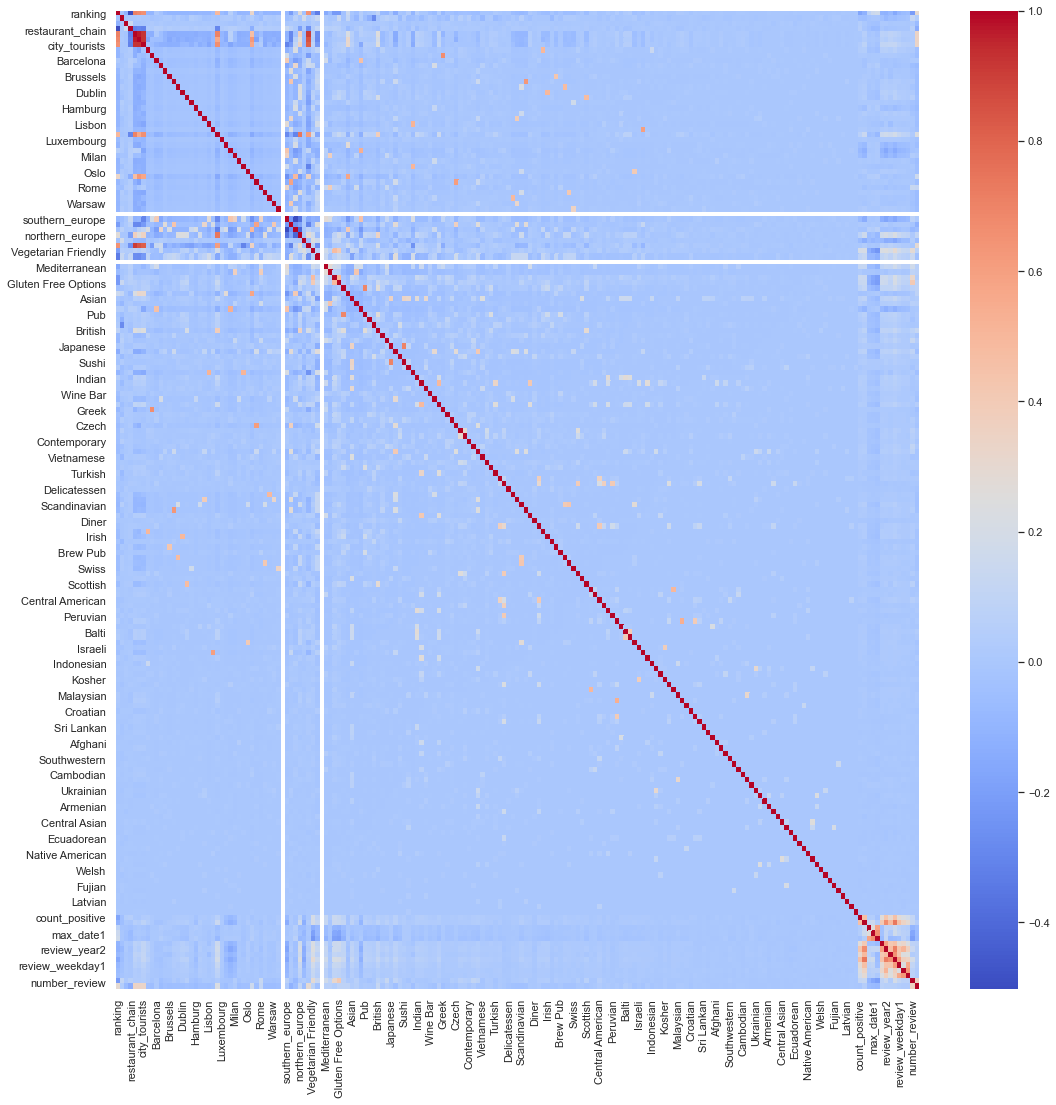

In [113]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(df_cor, cmap='coolwarm')

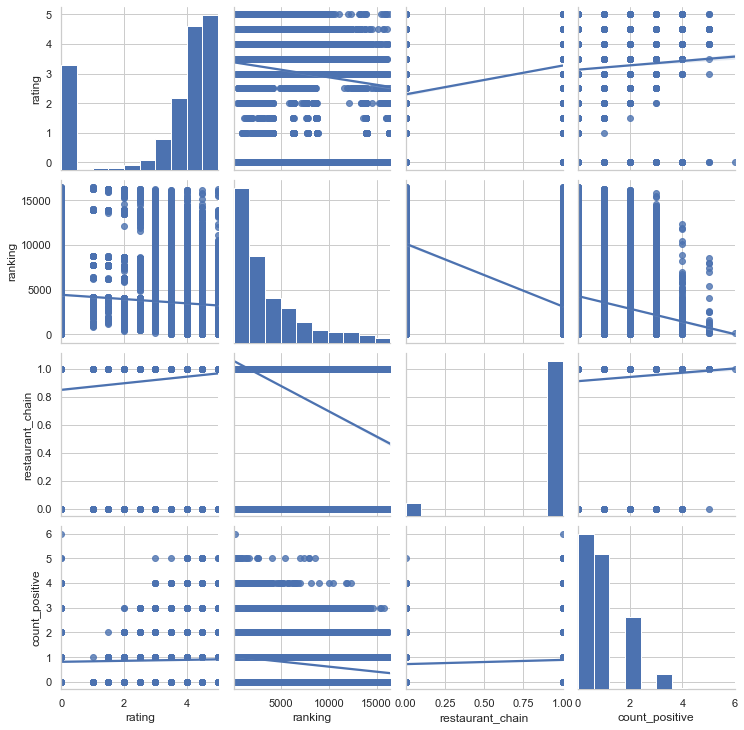

In [114]:
# посмотрим на графики тех переменных, которые наиболее зависимы с переменной rating
sns.pairplot(df[['rating', 'ranking', 'restaurant_chain', 
                 'count_positive']], kind='reg')

In [115]:
# код по очистке данных 
# уберем наименее важные колонки в зависимости от значения корреляции
temp_df = pd.DataFrame(data=df_cor['rating'].sort_values(ascending=False))
unimportant_columns1 = temp_df[temp_df.rating>-0.001]
unimportant_columns = unimportant_columns1[unimportant_columns1.rating<0.001].index

df = df.drop(unimportant_columns, axis = 1)
df = df.drop(['cuisine_styles', 'restaurant_id','city', 'reviews','URL_TA', 'ID_TA', 'rev_date1', 'rev_date2', 
              'review_weekday1', 'review_weekday2', 'numrev_isna'], axis=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 170 entries, ranking to rank_numrev
dtypes: float64(7), int64(134), uint8(29)
memory usage: 55.2 MB


In [117]:
df.sample(5)

,ranking,price_range,sample,rating,restaurant_chain,city_rest,city_population,city_tourists,Amsterdam,Athens,Berlin,Bratislava,Brussels,Budapest,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,NaN,southern_europe,central_europe,western_europe,northern_europe,cuisine_count,city_cuisine,Vegetarian Friendly,European,Unknown,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,British,International,Seafood,Japanese,Central European,American,Sushi,Chinese,Portuguese,Indian,Middle Eastern,Thai,Wine Bar,German,Halal,Greek,Healthy,Fusion,Czech,Steakhouse,Barbecue,Contemporary,Soups,Vietnamese,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Lebanese,Diner,Latin,Dutch,Irish,Street Food,Belgian,Brew Pub,Danish,Swedish,Swiss,Argentinean,Korean,Scottish,African,Moroccan,Brazilian,Pakistani,Peruvian,Caribbean,Nepali,Bangladeshi,Norwegian,Israeli,Slovenian,Persian,Indonesian,Russian,Arabic,Kosher,Ethiopian,Malaysian,Jamaican,Australian,Croatian,Cuban,Colombian,Sri Lankan,Taiwanese,Tibetan,Afghani,Egyptian,Southwestern,Hawaiian,Tunisian,Cambodian,Singaporean,Mongolian,Ukrainian,Georgian,Filipino,Armenian,Chilean,Central Asian,Minority Chinese,Albanian,Ecuadorean,Canadian,New Zealand,Native American,Uzbek,Caucasian,Azerbaijani,Yunnan,Fujian,Burmese,Latvian,Salvadoran,Xinjiang,count_positive,count_words,date1_date2,max_date1,max_date2,review_month2,review_year2,review_year1,weekend,number_review,rank_numrev
34119,8690.0,2.5,1,5.0,1.0,6108,9845879,19087.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,9,103,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,96,147,250,1,1900,1900,0,7.0,60830.0
43582,9464.0,2.5,1,5.0,1.0,7193,8866541,19559.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,96,147,250,1,1900,1900,0,138.0,1306032.0
8883,3718.0,2.5,0,0.0,0.0,2589,4342212,10317.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,4,81,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,96,147,222,7,2017,1900,0,327.0,1215786.0
23237,2173.0,2.5,1,3.5,1.0,2694,3606653,6604.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,84,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,96,160,136,10,2017,2017,0,717.0,1558041.0
33234,8384.0,2.5,1,4.5,1.0,7193,8866541,19559.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,111,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,96,128,136,10,2017,2017,1,49.0,410816.0


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [118]:
train_data = df.query('sample == 1').drop(['sample'], axis=1)
test_data = df.query('sample == 0').drop(['sample'], axis=1)

In [119]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 10000 to 49999
Columns: 169 entries, ranking to rank_numrev
dtypes: float64(7), int64(133), uint8(29)
memory usage: 44.1 MB


,ranking,price_range,rating,restaurant_chain,city_rest,city_population,city_tourists,Amsterdam,Athens,Berlin,Bratislava,Brussels,Budapest,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,NaN,southern_europe,central_europe,western_europe,northern_europe,cuisine_count,city_cuisine,Vegetarian Friendly,European,Unknown,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,British,International,Seafood,Japanese,Central European,American,Sushi,Chinese,Portuguese,Indian,Middle Eastern,Thai,Wine Bar,German,Halal,Greek,Healthy,Fusion,Czech,Steakhouse,Barbecue,Contemporary,Soups,Vietnamese,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Lebanese,Diner,Latin,Dutch,Irish,Street Food,Belgian,Brew Pub,Danish,Swedish,Swiss,Argentinean,Korean,Scottish,African,Moroccan,Brazilian,Pakistani,Peruvian,Caribbean,Nepali,Bangladeshi,Norwegian,Israeli,Slovenian,Persian,Indonesian,Russian,Arabic,Kosher,Ethiopian,Malaysian,Jamaican,Australian,Croatian,Cuban,Colombian,Sri Lankan,Taiwanese,Tibetan,Afghani,Egyptian,Southwestern,Hawaiian,Tunisian,Cambodian,Singaporean,Mongolian,Ukrainian,Georgian,Filipino,Armenian,Chilean,Central Asian,Minority Chinese,Albanian,Ecuadorean,Canadian,New Zealand,Native American,Uzbek,Caucasian,Azerbaijani,Yunnan,Fujian,Burmese,Latvian,Salvadoran,Xinjiang,count_positive,count_words,date1_date2,max_date1,max_date2,review_month2,review_year2,review_year1,weekend,number_review,rank_numrev
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0000,40000.000000,40000.000000,40000.0000,40000.000000,40000.0000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04
mean,3676.028525,2.317900,3.993037,0.934450,3201.968775,4.296346e+06,9378.994717,0.027150,0.015700,0.053875,0.007525,0.026500,0.020400,0.016825,0.014900,0.012025,0.023725,0.009400,0.011075,0.004575,0.143925,0.005

In [120]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
y = train_data['rating'].values
X = train_data.drop(['rating'], axis = 1)


In [121]:
y

array([3.5, 4. , 4.5, ..., 4.5, 4. , 3. ])

In [122]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [123]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [124]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [125]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
# model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [126]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [127]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2067095


In [128]:
# округленные значения предсказаний
import numpy as np
y_pred1 = np.around(y_pred, 1)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))

MAE: 0.20430999999999996


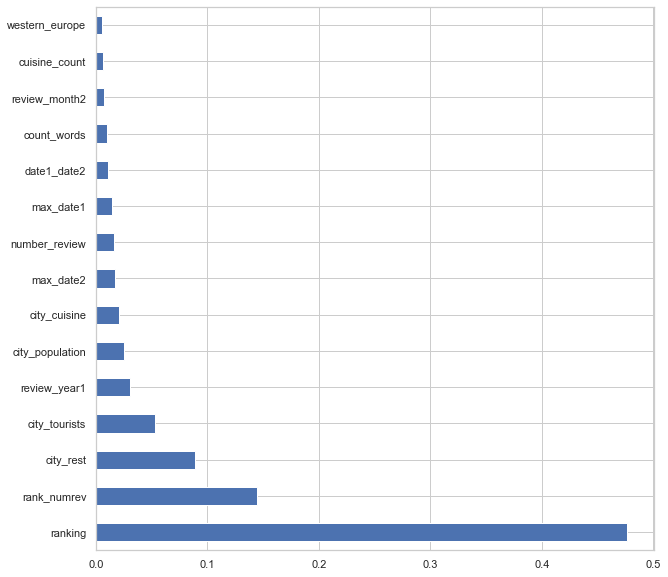

In [129]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Готовим Submission

In [130]:
test_data.sample(10)

,ranking,price_range,rating,restaurant_chain,city_rest,city_population,city_tourists,Amsterdam,Athens,Berlin,Bratislava,Brussels,Budapest,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,NaN,southern_europe,central_europe,western_europe,northern_europe,cuisine_count,city_cuisine,Vegetarian Friendly,European,Unknown,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,British,International,Seafood,Japanese,Central European,American,Sushi,Chinese,Portuguese,Indian,Middle Eastern,Thai,Wine Bar,German,Halal,Greek,Healthy,Fusion,Czech,Steakhouse,Barbecue,Contemporary,Soups,Vietnamese,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Lebanese,Diner,Latin,Dutch,Irish,Street Food,Belgian,Brew Pub,Danish,Swedish,Swiss,Argentinean,Korean,Scottish,African,Moroccan,Brazilian,Pakistani,Peruvian,Caribbean,Nepali,Bangladeshi,Norwegian,Israeli,Slovenian,Persian,Indonesian,Russian,Arabic,Kosher,Ethiopian,Malaysian,Jamaican,Australian,Croatian,Cuban,Colombian,Sri Lankan,Taiwanese,Tibetan,Afghani,Egyptian,Southwestern,Hawaiian,Tunisian,Cambodian,Singaporean,Mongolian,Ukrainian,Georgian,Filipino,Armenian,Chilean,Central Asian,Minority Chinese,Albanian,Ecuadorean,Canadian,New Zealand,Native American,Uzbek,Caucasian,Azerbaijani,Yunnan,Fujian,Burmese,Latvian,Salvadoran,Xinjiang,count_positive,count_words,date1_date2,max_date1,max_date2,review_month2,review_year2,review_year1,weekend,number_review,rank_numrev
8068,7788.0,1.0,0.0,0.0,6108,9845879,19087.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,103,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10,96,280,53,1,2018,2017,0,43.0,334884.0
9421,2589.0,2.5,0.0,1.0,1145,1484226,4205.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,78,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,96,147,837,11,2015,1900,0,13.0,33657.0
7466,438.0,2.5,0.0,0.0,7193,8866541,19559.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,111,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,96,50,54,1,2018,2018,1,380.0,166440.0
9876,13282.0,2.5,0.0,1.0,6108,9845879,19087.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,103,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,11,84,668,752,2,2016,2016,0,65.0,863330.0
3762,1782.0,2.5,0.0,1.0,1186,1847253,6783.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10,1540,1981,3521,7,2008,2012,0,3.0,5346.0
9771,2365.0,2.5,0.0,1.0,6108,9845879,19087.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,5,103,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,11,36,202,238,7,2017,2017,0,101.0,238865.0
6258,11046.0,2.5,0.0,1.0,6108,9845879,1

In [131]:
test_data = test_data.drop(['rating'], axis=1)

In [132]:
df_test = pd.read_csv('kaggle_task.csv')
df_test

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354
...,...,...,...,...,...,...,...,...,...
9995,id_9995,London,"['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...",4367.0,$,28.0,[['By far best Chicken burgers and wings in L....,/Restaurant_Review-g186338-d11916827-Reviews-C...,d11916827
9996,id_9996,Lisbon,"['Indian', 'Asian', 'Nepali', 'Bangladeshi']",2612.0,$$ - $$$,2.0,"[['Ok indian food'], ['11/25/2017']]",/Restaurant_Review-g189158-d12701633-Reviews-C...,d12701633
9997,id_9997,Milan,NaN,5562.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194
9998,id_9998,Milan,['Italian'],4010.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d3862815-Reviews-La...,d3862815


In [133]:
df_sample

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [134]:
predict_submission = regr.predict(test_data)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [135]:
predict_submission

array([3.075, 4.07 , 4.355, ..., 3.015, 4.47 , 4.385])

In [136]:
df_sample['Rating'] = np.around(predict_submission, 1)
df_sample.to_csv('submission_1.csv', index=False)
df_sample.head(10)

,Restaurant_id,Rating
0,id_0,3.1
1,id_1,4.1
2,id_2,4.4
3,id_3,4.4
4,id_4,4.4
5,id_5,4.3
6,id_6,2.0
7,id_7,2.4
8,id_8,4.1
9,id_9,4.6
